# Energy Poverty in California & New York: measuring and distribution
Spring 2021

<b>Author</b> Cristina Crespo

<b>Supervisors</b> Duncan Callaway, Daniel Kammen

<b>Acknowledgements</b> Avery Byrne, Alex Pfeifer-Rosenblum, Sena Soysal

### Table of Contents
I. [Project Background](#background)<br>
II. [Input Dataset Description](#description)<br>
III. [Data Cleaning](#load) <br>
IV. [Data Summary and Exploratory Data Analysis:](#eda)<br>
V. [Forecasting and Prediction Modeling](#prediction) <br>
VI. [Interpretation and Conclusions](#conclusions) <br>

---

## Project Background <a id='background'></a>


As an introduction to the prediction problems that we will perform, we will apply several methods for two types of prediction:
- Regression methods on `TOTALBTU`: the total energy consumed by the houshold fron Natural Gas and Electricity.
- Classification methods on `SCALEB`: whether a houshold has had to "forgo basic necessities due to home energy bills", and the frequency of such an event. We will aggregate this to a binary yes/no response to whether houholds forego basic needs due to energy bills.

---

## Input Data Description <a id='description'></a>

We provide detailed descriptions for the *two* datasets which our project uses as the main sources for the prediction (RECS) and the resource allocation (ACS) problem.

We describe the provenance and structure of the other *two* datasets (LEAD energy exenditure and HUD rural/urban divide) that are used to enhance our ACS dataset in the separate jupyter notebook `ACS_EDA.ipynb` attached to the submission, where they are used to create inputs to the present file.

We should also mention the use of a *fifth* geospatial dataset, the Cartographic Boundary Files from the US Census Bureau that will be used for visualisations and contains shapefiles of different administrative boundaries in the US, based on the 2010 US Census.

- ##### Residential Energy Consumption Survey (2015)

**Dataset description**
The most recent Residential Energy Consumption Survey (RECS) collected information regarding annual energy consumption, appliance saturation, building characteristics, and demographics from 5,686 households for the 2015 calendar year. Currently in its 14th iteration, the survey has been conducted since 1978 by the US Energy Information Administration (EIA). The EIA produces a representative sample of households by employing a complex methodology that accounts for the probability that households reside in a given area; overall, surveyed residents are randomly drawn from a sample of over 118 million households in the US. We downloaded RECS from the EIA website, and used the dataset as our primary source for training the models and determining which models produced the most accurate results.
<p>
<b>Structure</b>: Data was downloaded in a .csv format. While some features provide standard numeric values (for example, 'TOTHSQFT' provides the actual number of square feet in the household), other features provide information that is encoded (for example, 'MONEYPY' represents household income, but 1 = less than 20k USD, 2 = 20k-40k USD, etc) and which required integratation with a lengthy data dictionary. The features represent a range of information relating to household energy consumption, appliances, building characteristics, and demographics, including information that is both quantitative and categorical. <br>
<b>Granularity</b>: Each observation represents a household in the US. While the overall aggregation is consistently at the household level, some of the features are specific to a particular time of day or year: for example, 'TEMPHOMEAC' represents where a customer sets their thermostat during the day when a resident is home, and 'TEMPNITE' represents winter temperature at night. Other fields also ask customers to aggregate their number of appliances by usage: for instance, 'LGTIN4' represents the number of lightbulbs that are on for at least 4 hours a day. <br>
<b>Scope</b>: RECS surveyed households living in the United States, and collected information for the 2015 calendar year. One limitation to the scope of the data is that the level of geographic aggregation is quite broad: households are divided into census regions only (for example, the "Pacific" region includes 5 states), rather than specific states or areas within states. <br>
<b>Temporality</b>: Data was collected to represent the 2015 calendar year. For some of the fields for which statistical estimates of energy consumption were imputed, billing data may have been used for less than the full year. RECS includes fields that track the time period under which billing information was provided.  <br>
<b>Faithfulness</b>: The EIA has conducted RECS 14 times since 1978, and should be a reliable data source given the agency's years of experience conducting the survey. It is noteable that some fields have been statistically imputed -- though RECS includes a separate column for each of these features that flags whethere the information has been imputed. In addition, some information was estimated by the resident -- for example, the resident may provide their best guess about the temperature in the summer or the number of hours per day that the television is on. Finally, it is worth noting that some fields have a large number 'N/A' values (encoded by the '-2' values).

- ##### American Community Survey 2015 

**Data collection and querying** 

We are looking at Census Data that comes from the 5-year American Community Survey. The data is collected over 5 years and gives a very high level of detail on health, demigraphics and housing of housholds across the US (data given per census block group). The ACS produces survey-based period estimates. For instance, the 5-year 2011-2015 estimates are based on data collected during all 5 years, through selecting a random sample of housholds (around 2 million per year) across the US, and interviewing them. Data is hence collected during 60 months.


In order to obtain the data we downloaded a python package that interfaces with the Census API, documentation on this package can be found here: https://jtleider.github.io/censusdata/. The API code repository: https://github.com/jtleider/censusdata. The API this package uses is the official US Census API, which can be found at: https://www.census.gov/data/developers.html




**Dataset description**

- Structure: Each entry (row) represents 5-year estimates for variables in a particular census block group in the US. Columns represent individual variables relating to health, housing and socio-economic indicators.
- Granularity: Data is given at the census block group level (smaller than zipcode and census tract), and represents aggregate data of randomized housholds in that census block group, over 5 years.
- Scope: Each obersvation (census block) has been randomly sampled from every state, the District of Columbia, and Puerto Rico, census blocks not sampled have synthetic data, estimated by the Census Bureau, so that there is full coverage of the US. Topics covered include income, employment, health insurance, the age distribution, and education. 
- Temporality: The 5-year ACS gives estimates of the values of the data at the Census Block level, based on the data collected in the ACS yearly surveys. However, as the Census Bureau points out as a disclaimer, this is not merely the average of the variable values of the 5 annual ACS surveys, but has gone through more statistically robust checks. Hence, each entry only has one estimate per variable that shows the representative value of that variable in the 5-year period of the ACS (2015-2019 for instance in the case above).
- Faithfullness: The data comes from a very offical source, the US Census Bureau. There is some metadata on what values variables take if there are any errors (-888888), which should be dropped or reserved to understand any systematic reasosn why those errors occured. Margins of errors/levels of uncertainty are reported for the variables, so we ahould check these when drawing conclusions from variables that might be more uncertain. Note: it is not clear to me how we deal with how errors propagate from our individual variables to our ML models.

Maybe a reason to question its validity would be that the data is taken over a period of multiple years to only represent a typical household at one moment in time, but given the nature of census survey data collection methods, this seems acceptable to me. The great limiting factor is that that the data is given as census block estimates, whilst we will use ML on houshold level informatino form the RECS to train our algorithm. Although researches have used these two datasats in conjunction before, we have to be careful with how we interpret results. Another limiting aspect is that we don't have variables on energy consumption in this dataset, so we will need to use ML methods on the Residential Energy Consumption Survey (RECS) and then match/project rhose to our ACS data to generate eneryg conusption estimates at the census block. 

**Cleaning operations to do**

We pweform transformations to be done on this dataset in order to create "typical census block group housholds" from the ACS dataset:
- 1) Identify the variables that exist in both RECS and ACS surveys, or similar enough to transform one into the other (ie. if RECS has income per year and ACS has income per month - transform to month in both cases) 
- 2) For the variables matched, transform census block variables to household varaibles. For instance, in the case of socio-economic data, a census block will give counts of households that are from a certain income bracket. We will have to transform those into percentages for the typical composition of a houshold in the census block.
- 3) Normalize variables that are shared in RECS and ACS
- 4) Merge variables that do not exist in ACS but do exist in RECS, such as the rural/urban classification of the census block group
- 5) Delete/comine and reweight cardinal variables that have different classes in RECS and ACS

---

## Data Cleaning  <a id='load'></a>
We will walk through the data cleaning of RECS for out *preriction problem*. Merging processes do not occur in this section, since the merging of other datasets is done to prepare the ACS for the *resource allocation* problem, and is hence in the `ACS_EDA.ipynb`. Merging processes also occur for the final visualisations in this file.


#### Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings 
import geopandas as gpd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix


warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

sns.set(style="ticks", rc={"axes.labelsize":36})

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 14
np.set_printoptions(4)



import recs_EDA

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### 1. Import RECS


In [2]:
year_analysis = 2015

if year_analysis == 2015:
    RECS_raw = pd.read_csv('/Users/cristinacrespo/Desktop/UC BERKELEY/Master Capstone/model/in/recs2015_public_v4.csv')
else:
    RECS_raw = pd.read_csv('/Users/cristinacrespo/Desktop/UC BERKELEY/Master Capstone/model/in/recs2009_public.csv')
    
RECS_raw.shape

(5686, 759)

##### 2. Subset to climate region where California is found and drop variables that do not aid with prediction problems.
RECS classifies households into one of ten Census Divisions, each of which contains several states. Here, we subset 
to the Census division `Pacific` which includes 5 states, including California -- the state on which we chose to focus.

<img src="/Users/cristinacrespo/Desktop/UC BERKELEY/Master Capstone/model/divisions.png" width="400">



In [3]:
#subset CA CLIMATE_REGION_PUB, IECC_CLIMATE_PUB, or REGIONC
filter_climate = True #if False, all observations used for training/testing

RECS, RECS_region, check_miss, Y= recs_EDA.recs_filtering(RECS_raw, filter_climate)

##### Identifying missingness

We wanted to reduce the amount of synthetic data that we'd need to create for features with missing data, so we removed features (columns) with missing data that surpassed a given threshold. We decided to use a 90% threshold (no more than 90% of data for a given feature may be missing) in order to remove the variables with an exorbitant amount of missing data -- though fine-tuning this threshold could have been an interesting experiment in itself.

We then plotted the correlation of the variables with high levels of missing data and the total btu (our dependent variable). 

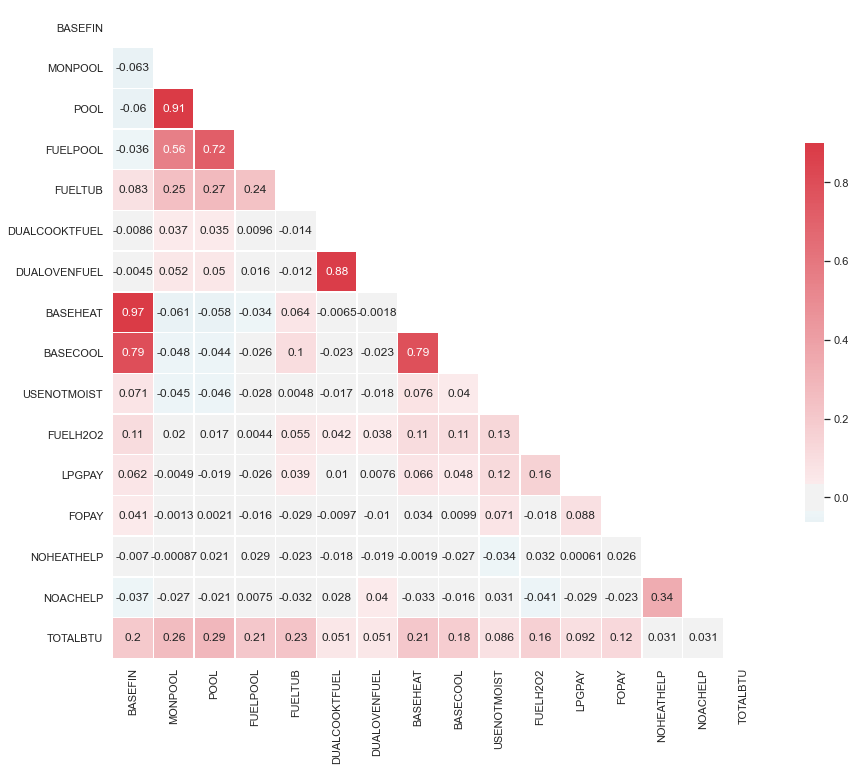

In [4]:
#sns.set_context("paper", rc={"axes.labelsize":36})
sns.set(style="white")
df = RECS_region[check_miss]
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5})
plt.show()


Missingness was common in the raw dataset, with 15 features having NA values in more than 90% of observations. In order to gauge whether these variables had predictive power and should thus should be retained and imputed, we created the correlation plot above. We found that these features had low correlation with the quantitative outcome variable (TOTALBTU) and had non-significant p-values (not shown), so we could thus have confidence that we could remove these variables without negatively impacting the model.

##### 2. Deal with nominal v ordinal variables, normalize & input missing data

In [5]:
RECS_clean, Y_norm, cardinal = recs_EDA.vb_transform(RECS, Y)

---

## Data Summary and Exploratory Data Analysis (10 points) <a id='eda'></a>

Here we visualise some of our raw data to understand drivers of energy consumption in the houshold characteristics and housing units.

In [6]:
RECS_clean.describe()

,STORIES,YEARMADERANGE,OCCUPYYRANGE,BEDROOMS,TOTROOMS,WINDOWS,TYPEGLASS,SIZRFRI1,AGERFRI1,SIZRFRI2,...,FOWARM_1.0,FOWATER_1.0,USEWOOD_1.0,WOODLOGS_1.0,WDPELLET_1.0,WDOTHER_1.0,WDWARM_1.0,USESOLAR_1.0,SOLWATER_1.0,SOLOTHER_1.0
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,...,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,0.168049,0.565270,0.831781,0.455607,0.361219,0.244958,0.315668,0.646401,0.287879,0.402426,...,0.010138,0.002765,0.123502,0.119816,0.006452,0.002765,0.123502,0.013825,0.007373,0.006452
std,0.249175,0.271927,0.219881,0.189545,0.168731,0.199703,0.248860,0.166727,0.236488,0.207357,...,0.100223,0.052535,0.329165,0.324896,0.080099,0.052535,0.329165,0.116818,0.085590,0.080099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.454545,0.689655,0.333333,0.230769,0.155844,0.000000,0.586207,0.090909,0.241379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.568182,0.862069,0.500000,0.384615,0.155844,0.500000,0.586207,0.272727,0.390805,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.795455,1.000000,0.500000,0.461538,0.298701,0.500000,0.793103,0.500000,0.586207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We check that our `X` variables have been correctly normalised.

##### Visualization for cardinal values

We visualized multicollinearity among the numeric features using correlation plots. In the plot below, a group of collinear variables stands out: those directly or indirectly representing a residence’s size, for example, total square footage (TOTSQFT), cooling square footage (TOTCSQFT), heating square footage (TOTHSQFT), number of bathrooms (NCOMBATH), number of bedrooms (BEDROOMS) and total rooms (TOTROOMS), etc.

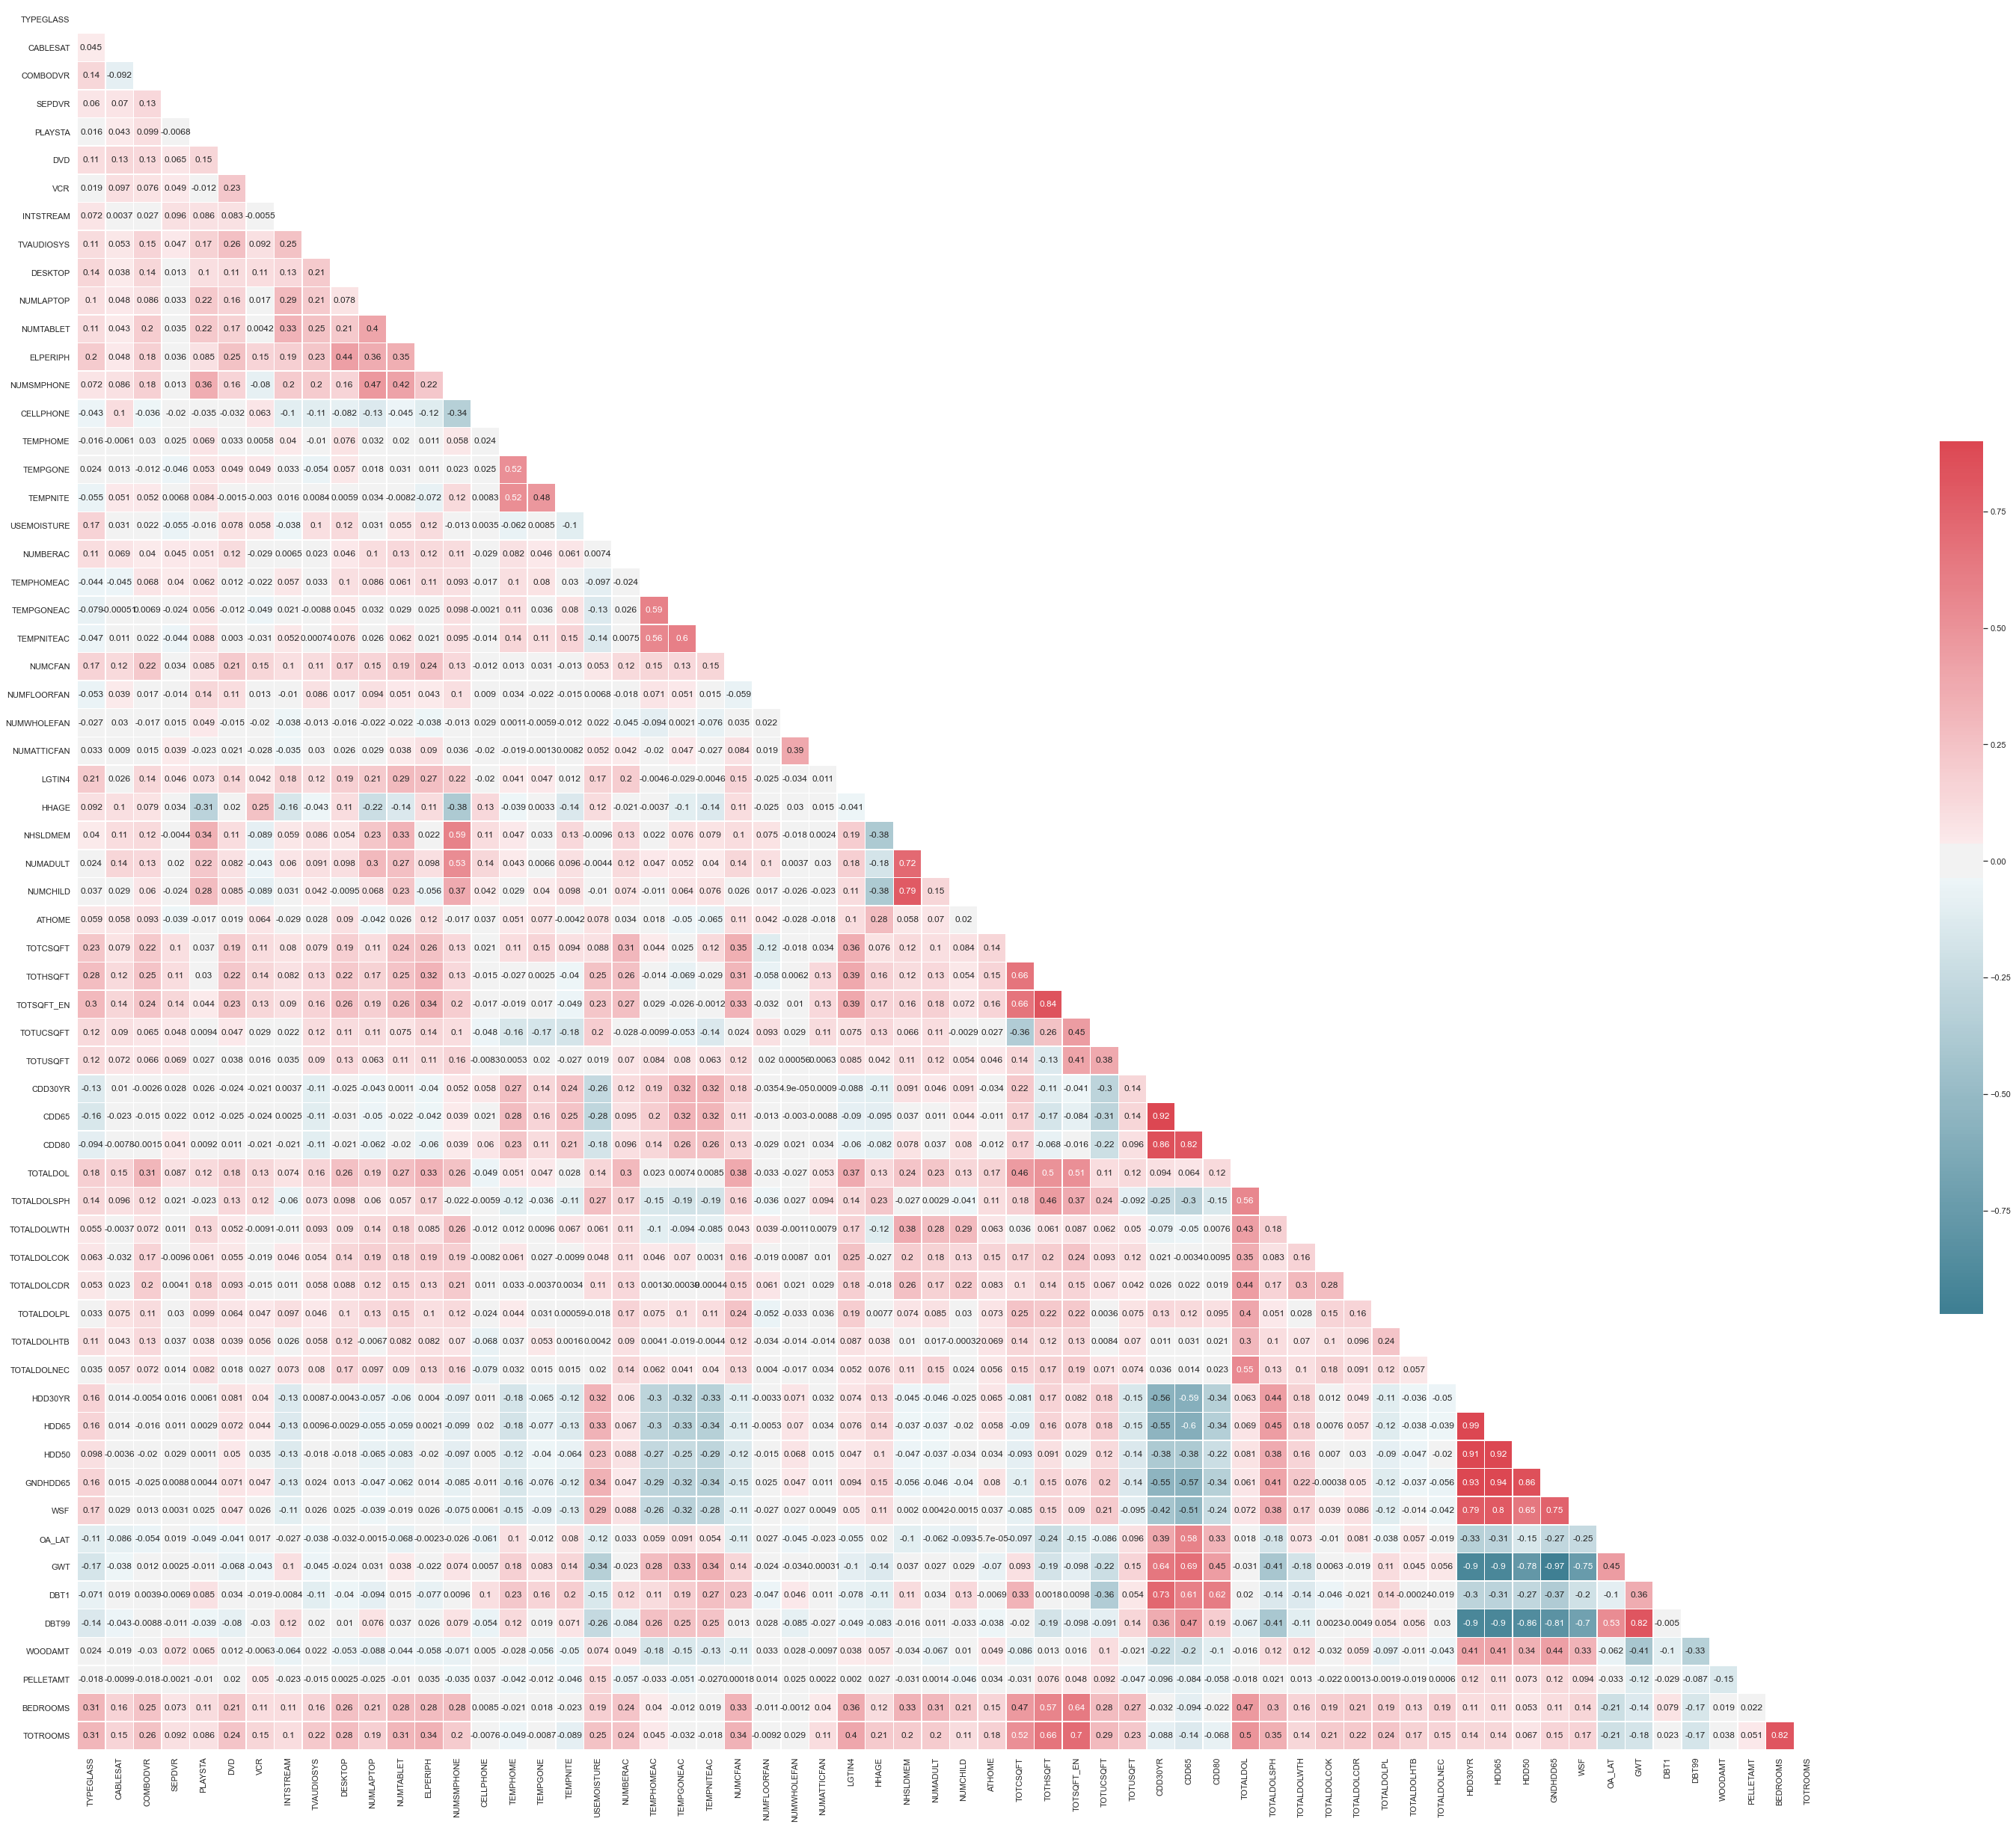

In [7]:
sns.set(style="white")
corr = RECS_clean[cardinal].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(50, 40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5})
plt.show()

To confirm the degree of multicollinearity, the variance inflation factors were calculated based on a linear model with the above numeric features. We though about dropping those with high VIF scores (> 5.0) but decided against it, given that we were going to apply methods that can deal with this collinearity, but we can forsee that we will certainly have a bad performance of OLS when using these collinear features.

In [8]:
#Check for collinearity in the full dataframe

# VIF dataframe 
#vif_data = pd.DataFrame() 
#vif_data["feature"] = RECS_clean.columns 
  
# calculating VIF for each feature 
#vif_data["VIF"] = [variance_inflation_factor(RECS_clean.values, i) 
                          #for i in range(len(RECS_clean.columns))] 

In [9]:
pd.set_option('display.max_rows', None)


#vif_data.sort_values(by="VIF", ascending=False)
#cols = vif_data[vif_data.VIF > 10]["feature"].values
#try_X = RECS_clean.drop(columns = cols)

#### Exploratory  visualizations of our quantitative response variable TOTALBTU and regressors
Our quantitative response variable, TOTALBTU, is the total annual energy consumption (including electricity and gas consumption) in 2015. We began by creating the scatterplots below to visualize the relationship between our response variable and key features. While some trends are apparent from these visuals -- there appears to be a positive relationship between total heating square footage and energy consumption, for instance -- it quickly became apparent that these relationships would be easier to visualize through the boxplots that follow the scatterplots below.

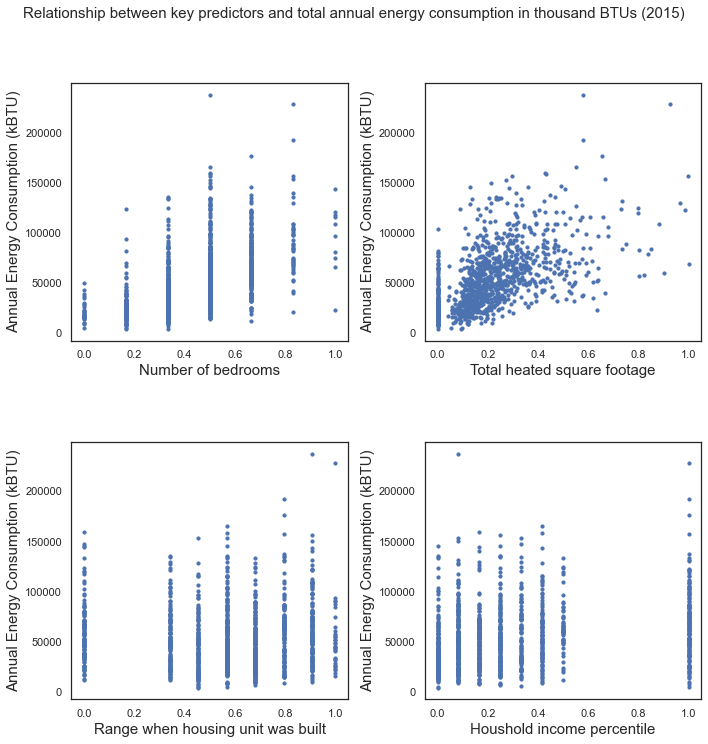

In [19]:
y = Y['TOTALBTU'] #Total site energy usage in thousand BTUs.
ylab = "Annual Energy Consumption (kBTU)" # y axis label

msize = 10 # marker size
afsize = 15 # axis font size
tfsize = 15 # title font size

plt.figure(figsize = (10,10))

plt.subplot(221)
plt.scatter(RECS_clean['BEDROOMS'], y, s = msize)
plt.xlabel('Number of bedrooms', fontsize = afsize)
plt.ylabel(ylab, fontsize = afsize)

plt.subplot(222)
plt.scatter(RECS_clean['TOTHSQFT'], y, s = msize)
plt.xlabel('Total heated square footage', fontsize = afsize)
plt.ylabel(ylab, fontsize = afsize)

plt.subplot(223)
plt.scatter(RECS_clean['YEARMADERANGE'], y, s = msize)
plt.xlabel('Range when housing unit was built', fontsize = afsize) 
#1 - Before 1950, 2- 1950 to 1959, 3- 1960 to 1969, 4- 1970 to 1979
#5- 1980 to 1989, 6- 1990 to 1999, 7 - 2000 to 2009, 8 - 2010 to 2015
plt.ylabel(ylab, fontsize = afsize)
#plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['Before 1950', '1950 to 1959', '1960 to 1969', '1970 to 1979', '1980 to 1989', '1990 to 1999', '2000 to 2009', '2010 to 2015'], rotation=20)

plt.subplot(224)
plt.scatter(RECS_clean['MONEYPY'], y, s = msize)
plt.xlabel('Houshold income percentile', fontsize = afsize)
plt.ylabel(ylab, fontsize = afsize)
#plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ['Less than $20,000','$20,000 - $39,999','$40,000 - $59,999','$60,000 to $79,999','$80,000 to $99,999','$100,000 to $119,999','$120,000 to $139,999','$140,000 or more'], rotation=20)

plt.suptitle('Relationship between key predictors and total annual energy consumption in thousand BTUs (2015)', fontsize = tfsize,y=1.05)

plt.subplots_adjust(top=0.5) # avoid overlapping title and plots
plt.tight_layout()
plt.show()

As noted, the relationships between energy consumption and key model features are more easily visualized through boxplots. First, we explored annual energy consumption vs. annual income. The first several cells below divide our response variable into the appropriate bins, based on income; the boxplot visualization follows.

In [11]:
#Create bins for different income ranges.
under_20k = RECS_clean.loc[RECS_clean['MONEYPY'] == 0, 'MONEYPY'].index.values
twentyk_to_40k = RECS_clean.loc[(RECS_clean['MONEYPY'] > 0) & (RECS_clean['MONEYPY'] < .09) , 'MONEYPY'].index.values
fortyk_to_60k = RECS_clean.loc[(RECS_clean['MONEYPY'] > .09) & (RECS_clean['MONEYPY'] < .17) , 'MONEYPY'].index.values
sixtyk_to_100k = RECS_clean.loc[(RECS_clean['MONEYPY'] > .17) & (RECS_clean['MONEYPY'] < .34) , 'MONEYPY'].index.values
over_100k = RECS_clean.loc[RECS_clean['MONEYPY'] > .34, 'MONEYPY'].index.values


In [12]:
#Align response variable with selected income ranges.
btu = Y[["TOTALBTU"]].reset_index(drop = True)
btu_under_20k = btu.iloc[under_20k,:]
btu_twentyk_to_40k = btu.iloc[twentyk_to_40k,:]
btu_fortyk_to_60k = btu.iloc[fortyk_to_60k,:]
btu_sixtyk_to_100k = btu.iloc[sixtyk_to_100k,:]
btu_over_100k = btu.iloc[over_100k,:]

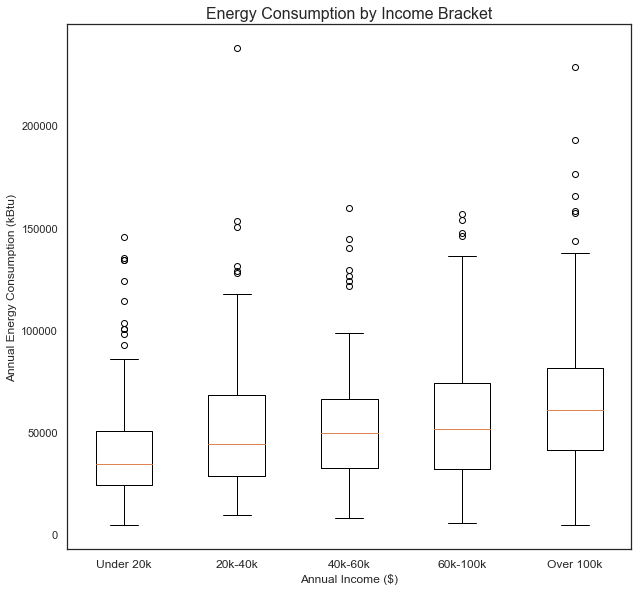

In [13]:
fig = plt.figure(1, figsize=(9, 9))
ax = fig.add_subplot(111)
plt.boxplot([btu_under_20k['TOTALBTU'], btu_twentyk_to_40k['TOTALBTU'], btu_fortyk_to_60k['TOTALBTU'], btu_sixtyk_to_100k['TOTALBTU'], btu_over_100k['TOTALBTU']])
ax.set_xticklabels(['Under 20k','20k-40k', '40k-60k', '60k-100k', 'Over 100k'], fontsize = 12)
plt.xlabel('Annual Income ($)')
plt.ylabel('Annual Energy Consumption (kBtu)')
plt.title('Energy Consumption by Income Bracket', fontsize = 16)
plt.show()

The boxplot above illustrates the relationship between annual energy consumption and income. We see that the median energy consumption increases (as does the mean) from approximately 34,000 kBTU annually (mean = 42,000 kBTU) for households earning less than 20k USD annually to approximately 61,000 kBTU (mean = 65,000 kBTU) for customers earning over 100k USD annually. The increases are the most dramatic when the income bins transition to over 20k USD and to over 100k USD; the mean and median annual energy consumption was a bit more stable in the ranges of 20k-40k USD to 60k-100k USD (when the median annual energy consumption ranges from 44,000 kBTU to 51,000 kBTU, resectively, and the mean ranges from 52,000 kBTU and 56,000 kBTU). We also see that the interquartile range is relatively constricted for customers earning under 20k USD, which is consistent with the idea that most low-income customers have less flexibility to increase energy usage beyond meeting their basic needs, while energy is more elastic for higher income households.

We then explored energy consumption by heated square footage. Again, the first several cells below divide our response variable into the appropriate bins, with the boxplot visualization following.

In [14]:
#Create bins for different ranges of heated square footage.
bin1 = RECS_clean.loc[RECS_clean['TOTHSQFT'] <= .117417, 'TOTHSQFT'].index.values
bin2 = RECS_clean.loc[(RECS_clean['TOTHSQFT'] > .117417) & (RECS_clean['TOTHSQFT'] <= .189489) , 'TOTHSQFT'].index.values
bin3 = RECS_clean.loc[(RECS_clean['TOTHSQFT'] > .189489) & (RECS_clean['TOTHSQFT'] <= .299099) , 'TOTHSQFT'].index.values
bin4 = RECS_clean.loc[RECS_clean['TOTHSQFT'] > .299099, 'TOTHSQFT'].index.values

In [15]:
#Align response variable with heated square footage bins
btu_bin1 = btu.iloc[bin1,:]
btu_bin2 = btu.iloc[bin2,:]
btu_bin3 = btu.iloc[bin3,:]
btu_bin4 = btu.iloc[bin4,:]

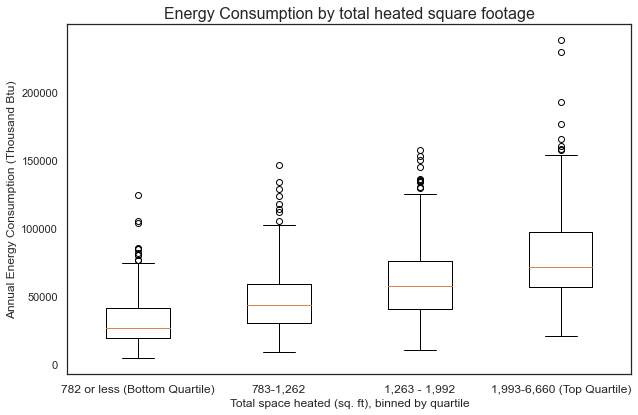

In [16]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot([btu_bin1['TOTALBTU'], btu_bin2['TOTALBTU'], btu_bin3['TOTALBTU'], btu_bin4['TOTALBTU']])
ax.set_xticklabels(['782 or less (Bottom Quartile)','783-1,262', '1,263 - 1,992', '1,993-6,660 (Top Quartile)'], fontsize = 12)
plt.xlabel('Total space heated (sq. ft), binned by quartile')
plt.ylabel('Annual Energy Consumption (Thousand Btu)')
plt.title('Energy Consumption by total heated square footage', fontsize = 16)
plt.show()

Here, there is a clearly visible relationship between heated square footage and annual energy consumption, as the median, interquartile ranges, and maximums get progressively greater as heating square footage increases.

We then explored energy consumption by the year the house was built.

In [17]:
#Create bins for different ranges of housing vintage
bin1_vintage = RECS_clean.loc[RECS_clean['YEARMADERANGE'] == 0, 'YEARMADERANGE'].index.values
bin2_vintage = RECS_clean.loc[(RECS_clean['YEARMADERANGE'] > 0) & (RECS_clean['YEARMADERANGE'] <= 0.5682) , 'YEARMADERANGE'].index.values
bin3_vintage = RECS_clean.loc[(RECS_clean['YEARMADERANGE'] > 0.5682) & (RECS_clean['YEARMADERANGE'] <= 0.7955) , 'YEARMADERANGE'].index.values
bin4_vintage = RECS_clean.loc[RECS_clean['YEARMADERANGE'] > 0.7955, 'YEARMADERANGE'].index.values

In [18]:
#Aligned response variable with housing vintage bins
btu_bin1_vintage = btu.iloc[bin1_vintage,:]
btu_bin2_vintage = btu.iloc[bin2_vintage,:]
btu_bin3_vintage = btu.iloc[bin3_vintage,:]
btu_bin4_vintage = btu.iloc[bin4_vintage,:]

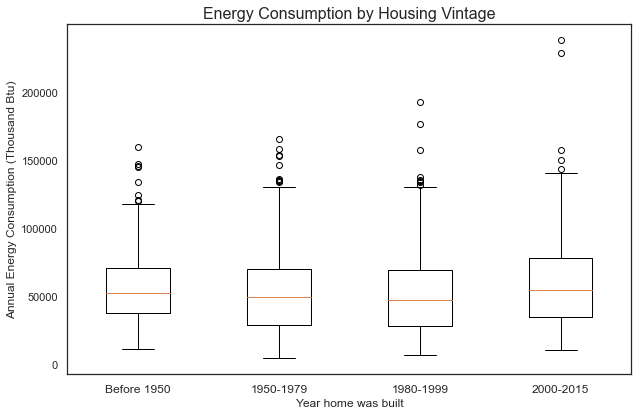

In [19]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot([btu_bin1_vintage['TOTALBTU'], btu_bin2_vintage['TOTALBTU'], btu_bin3_vintage['TOTALBTU'], btu_bin4_vintage['TOTALBTU']])
ax.set_xticklabels(['Before 1950','1950-1979', '1980-1999', '2000-2015'], fontsize = 12)
plt.xlabel('Year home was built')
plt.ylabel('Annual Energy Consumption (Thousand Btu)')
plt.title('Energy Consumption by Housing Vintage', fontsize = 16)
plt.show()

There is not an immediately apparent relationship between housing vintage and annual energy consumption, at least based on the bins selected.

Finally, we explored the relationship between the number of residents in the household and electricity consumption.

In [20]:
#Created bins for number of residents
bin1_residents = RECS_clean.loc[RECS_clean['NHSLDMEM'] <= 0.1111, 'NHSLDMEM'].index.values
bin2_residents = RECS_clean.loc[(RECS_clean['NHSLDMEM'] > 0.1111) & (RECS_clean['NHSLDMEM'] <= 0.3333) , 'NHSLDMEM'].index.values
bin3_residents = RECS_clean.loc[(RECS_clean['NHSLDMEM'] > 0.3333) & (RECS_clean['NHSLDMEM'] <= 0.6667) , 'NHSLDMEM'].index.values
bin4_residents = RECS_clean.loc[RECS_clean['NHSLDMEM'] > 0.6667, 'NHSLDMEM'].index.values

In [21]:
#Align target variable with bins for number of residents
btu_bin1_residents = btu.iloc[bin1_residents,:]
btu_bin2_residents = btu.iloc[bin2_residents,:]
btu_bin3_residents = btu.iloc[bin3_residents,:]
btu_bin4_residents = btu.iloc[bin4_residents,:]

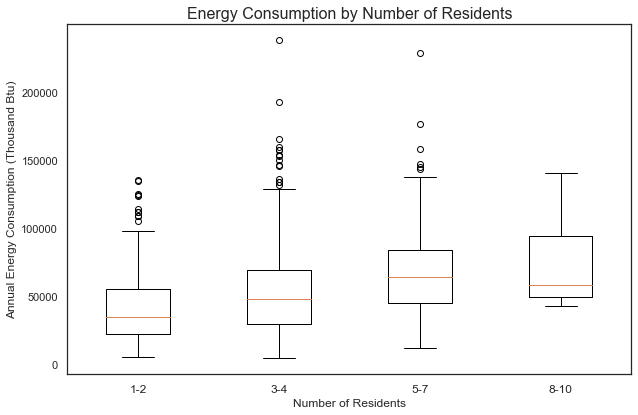

In [22]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot([btu_bin1_residents['TOTALBTU'], btu_bin2_residents['TOTALBTU'], btu_bin3_residents['TOTALBTU'], btu_bin4_residents['TOTALBTU']])
ax.set_xticklabels(['1-2','3-4', '5-7', '8-10'], fontsize = 12)
plt.xlabel('Number of Residents')
plt.ylabel('Annual Energy Consumption (Thousand Btu)')
plt.title('Energy Consumption by Number of Residents', fontsize = 16)
plt.show()

There is again a relationship between number of residents and annual energy usage. Perhaps most apparently, the interquartile ranges grow to encompass progressively larger values of annual energy consumption as the number of residents increases. The median also increases for the first three boxplots (it drops for the final boxplot with 8-10 residents); the mean consistently increases across all bins. There is moderately low correlation between the number of residents and the heating square footage included above (R = .12).

#### Exploratory  visualizations of our qualitative response variable SCALEB and regressor

We explored a visualization regarding whether households with lower incomes are more likely to forgo basic necessities due to their energy bill -- our qualitative response variable ('SCALEB'). The first several cells below divide our response variable into the appropriate bins, based on income; the barchart visualization follows. As a reminder, `SCALEB` codes for whether a household has forgone its energy needs in the ast year, and how frequently. In our model, we code this as a binary for having experienced the need to forego needs to cover energy expenses or not.

In [23]:
forgoes_needs = Y[["SCALEB"]].reset_index(drop = True)

In [24]:
dummies = []
for i in range(len(forgoes_needs)):
    if forgoes_needs['SCALEB'][i] > 0:
        dummy = 1
    else:
        dummy = 0
    dummies.append(dummy)

In [25]:
forgoes_needs['Dummies'] = dummies
forgoes_needs_dummies = forgoes_needs[['Dummies']]
scaleb_under_20k = sum(forgoes_needs_dummies.iloc[under_20k,:]['Dummies']) / len(forgoes_needs_dummies.iloc[under_20k,:]) * 100
scaleb_20k_40k = sum(forgoes_needs_dummies.iloc[twentyk_to_40k,:]['Dummies']) / len(forgoes_needs_dummies.iloc[twentyk_to_40k,:]) * 100
scaleb_40k_60k = sum(forgoes_needs_dummies.iloc[fortyk_to_60k,:]['Dummies']) / len(forgoes_needs_dummies.iloc[fortyk_to_60k,:]) * 100
scaleb_60k_100k = sum(forgoes_needs_dummies.iloc[sixtyk_to_100k,:]['Dummies']) / len(forgoes_needs_dummies.iloc[sixtyk_to_100k,:]) * 100
scaleb_over_100k = sum(forgoes_needs_dummies.iloc[over_100k,:]['Dummies']) / len(forgoes_needs_dummies.iloc[over_100k,:]) * 100

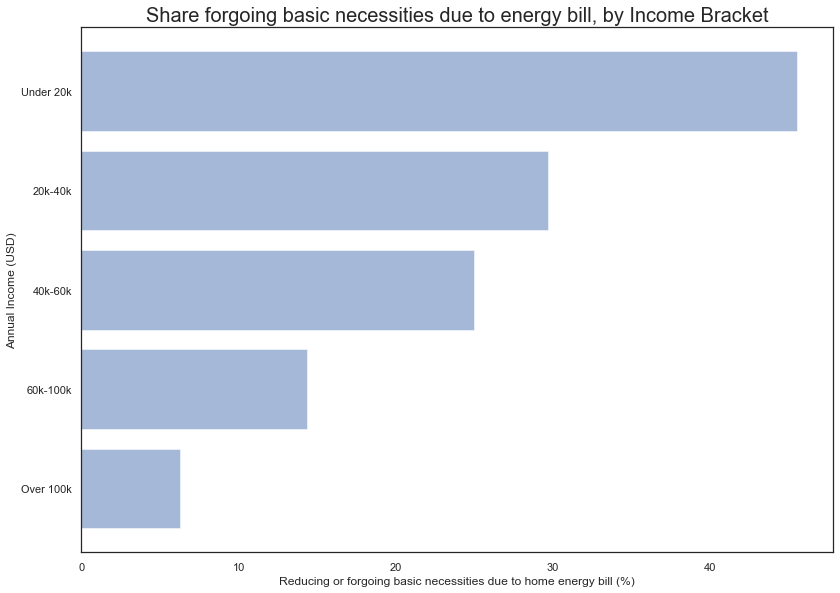

In [26]:
income_brackets = ('Over 100k','60k-100k', '40k-60k','20k-40k', 'Under 20k')
y_pos = np.arange(len(income_brackets))
scaleb_ratios = [scaleb_over_100k, scaleb_60k_100k, scaleb_40k_60k, scaleb_20k_40k, scaleb_under_20k]

plt.barh(y_pos, scaleb_ratios, align='center', alpha=0.5)
plt.yticks(y_pos, income_brackets)
plt.xlabel('Reducing or forgoing basic necessities due to home energy bill (%)')
plt.ylabel('Annual Income (USD)')
plt.title('Share forgoing basic necessities due to energy bill, by Income Bracket', size = 20)

plt.show()

As illustrated, households with lower annual incomes are significantly more likely to forgo basic necessities due to their home energy bill: Nearly 46% of households with annual incomes below 20k USD and 30% of households with incomes between 20k and and 40k USD responded positively to this survey question. Positive response rates gradually decreased as income increased -- though we were surprised to see that even 6% of households with annual incomes over 100k USD indicated that they were still forced to forgo basic necessities to meet their energy bills. 

---
## Selecting variables in RECS that are present in ACS<a id='select'></a>
Finally, we created a subset dataset that included the variables in the ACS that are also present in the RECS dataset. This allowed us to test models for both sets of data (the full RECS dataset as well as the smaller subset of variables in both RECS and ACS) during our prediction efforts later on.

In [7]:
#we can choose different variables if we enhance CS with further CoreLogic/weather info
ACS_variables = ['TYPEHUQ_2.0', 'TYPEHUQ_3.0', 'TYPEHUQ_4.0', 'TYPEHUQ_5.0', 'KOWNRENT_2.0', 'YEARMADERANGE', 'OCCUPYYRANGE', 'BEDROOMS', 'TOTROOMS', 'FUELHEAT_2.0', 'FUELHEAT_3.0', 'FUELHEAT_5.0', 'FUELHEAT_7.0', 'NHSLDMEM', 'MONEYPY', 'TOTALDOL', 'UATYP10_R', 'UATYP10_U']
RECS_ACS_subset = recs_EDA.vb_ACS_subset(RECS_clean, ACS_variables)

In [8]:
RECS_ACS_subset.describe()

,TYPEHUQ_2.0,TYPEHUQ_3.0,TYPEHUQ_4.0,TYPEHUQ_5.0,KOWNRENT_2.0,YEARMADERANGE,OCCUPYYRANGE,BEDROOMS,TOTROOMS,FUELHEAT_2.0,FUELHEAT_3.0,FUELHEAT_5.0,FUELHEAT_7.0,NHSLDMEM,MONEYPY,TOTALDOL,UATYP10_R,UATYP10_U
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,0.604608,0.099539,0.047005,0.198157,0.363134,0.565270,0.831781,0.455607,0.361219,0.021198,0.007373,0.310599,0.038710,0.196006,0.315054,0.172003,0.121659,0.812903
std,0.489160,0.299523,0.211746,0.398795,0.481125,0.271927,0.219881,0.189545,0.168731,0.144111,0.085590,0.462952,0.192991,0.167233,0.320536,0.119801,0.327042,0.390169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.689655,0.333333,0.230769,0.000000,0.000000,0.000000,0.000000,0.111111,0.083333,0.088578,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.568182,0.862069,0.500000,0.384615,0.000000,0.000000,0.000000,0.000000,0.111111,0.250000,0.143310,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.795455,1.000000,0.500000,0.461538,0.000000,0.000000,1.000000,0.000000,0.333333,0.416667,0.220099,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Visualizing Collinearity for RECS / ACS subset data
We also visualized collinearity for the subset data of factors that were shared between the RECS and ACS datasets. In addition to the collinearity that was mentioned previously (between number of bedrooms and total number of rooms), there was also, unsurprisingly, a high degree of collinearity between housing type (single-family, multi-family, etc) and whether the tenant is an owner or renter. For example, there was a strong negative relationship between single family detached home tenants (TYPHUQ_2.0) and being a renter (KOWNRENT2.0), and a strong positive relationship between being a tenant of an apartment with 5 or more units (TYPHUQ_5.0) and being a renter. The housing type variables also correlated as expected with number of rooms, with single family buildings positively correlated with the number of rooms within the residence, and apartments in buildings with 5 or more units negatively correlated with number of rooms in the residence. The UATYP10_R and UATYP10_U variables simply indicate that, unsurprisingly, there is a strong negative relationship between whether a resident resides in a rural or urban area.

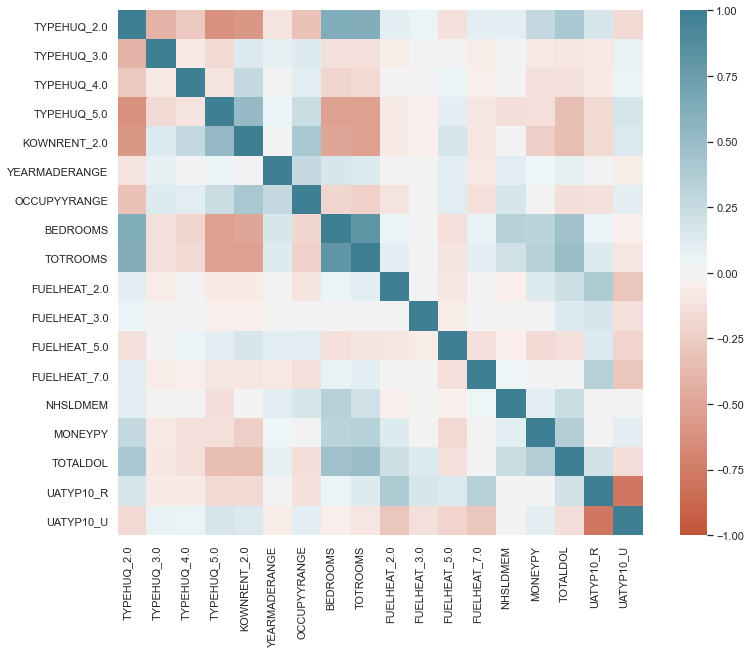

In [9]:
#Plot inspired by:
#https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec 

corr = RECS_ACS_subset.corr() #[['BEDROOMS', 'TOTHSQFT', 'YEARMADERANGE', 'TEMPHOME']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

plt.show()

## Forecasting and Prediction Modeling<a id='prediction'></a>



In [10]:
import regression_recs as reg
import classification_recs as classif

---
## Regression on slected dependent variable <a id='reg'></a>
Now in the cell below, we selected the variables in the ACS that are also present in the RECS dataset. Besides using the function we created below, we create test and train splits for X_all and X_subset data sets.

In [8]:
# Select dependent variable
efficiency = False
#_btu for TOTALBTU _all for all X variables, _sub for subset X variables also in ACS

if efficiency == False:
    y=Y[["TOTALBTU"]].reset_index(drop = True)
    
    X_all = RECS_clean
    X_sub = RECS_ACS_subset #[["YEARMADERANGE","OCCUPYYRANGE","BEDROOMS","TOTROOMS","FUELHEAT_2.0","FUELHEAT_3.0","FUELHEAT_5.0","FUELHEAT_7.0","FUELHEAT_21.0","NHSLDMEM","MONEYPY","TOTALDOL"]]
else:
    #calculate EUI (check if we should use btu or kwh and heating instead of total)
    y=Y[["TOTALBTU"]]/Y[["TOTHSQFT"]].reset_index(drop = True)
    
    X_all = RECS_clean.drop(columns = 'TOTHSQFT')
    X_sub = RECS_ACS_subset #[["YEARMADERANGE","OCCUPYYRANGE","BEDROOMS","TOTROOMS","FUELHEAT_2.0","FUELHEAT_3.0","FUELHEAT_5.0","FUELHEAT_7.0","FUELHEAT_21.0","NHSLDMEM","MONEYPY","TOTALDOL"]]



### Create splits for all models

The following cell will be used for all regression models to create the cross validated test/train splits in the data (conserving the same random state and proportion throughout the model comparisons).

In [9]:
test_prop = 0.2
rand_seed = 5

X_all_train, X_all_test, y_all_train, y_all_test = reg.get_X_y(X_all, y, test_prop, rand_seed) # get X and y train and test dataframes for full dataset
X_sub_train, X_sub_test, y_sub_train, y_sub_test = reg.get_X_y(X_sub, y, test_prop, rand_seed) # get X and y train and test dataframes for full dataset



We tried different lambdas for Ridge and Lasso regession. For ridge, as lambda gets larger, the bias is unchanged but the variance drops. For lasso, when lambda is small, the result is essentially the OLS. As lambda increases, shrinkage occurs and the variables that are at zero can be thrown away.

In the cell below, we run the OLS and regularization models and list them together.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Models = [LinearRegression, Ridge, Lasso] # list of models

# list that will hold MSE values - each element corresponds to a model in Models
mse_all = np.zeros(len(Models))
mse_sub = np.zeros(len(Models))

# initialize array that will hold coefficients - each column corresponds to a model in Models
coef_all = np.zeros((X_all_train.shape[1], len(Models)))
coef_sub = np.zeros((X_sub_train.shape[1], len(Models)))

# list that hold r2 for OLS, Ridge and Lasso
r2_all = np.zeros(len(Models))
r2_sub = np.zeros(len(Models))

for Model, i in zip(Models, np.arange(len(Models))):
    mse_all[i], coef_all[:,i], r2_all[i] = reg.regularization_fit(Model, X_all_train, X_all_test, y_all_train, y_all_test)
    mse_sub[i], coef_sub[:,i], r2_sub[i] = reg.regularization_fit(Model, X_sub_train, X_sub_test, y_sub_train, y_sub_test)

optimal alpha <class 'sklearn.linear_model._ridge.Ridge'>: 1.8182636363636364
optimal alpha <class 'sklearn.linear_model._ridge.Ridge'>: 0.10110909090909091
optimal alpha <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 91.81818181818183
optimal alpha <class 'sklearn.linear_model._coordinate_descent.Lasso'>: 31.272727272727273


The code below plots the coefficients for OLS, Ridge and Lasso, for all and subset features in RECS data. The plot for all features is not very informative. However, the second plot which show the coefficients of subset feature selection gives the better understanding of the importance of each features.

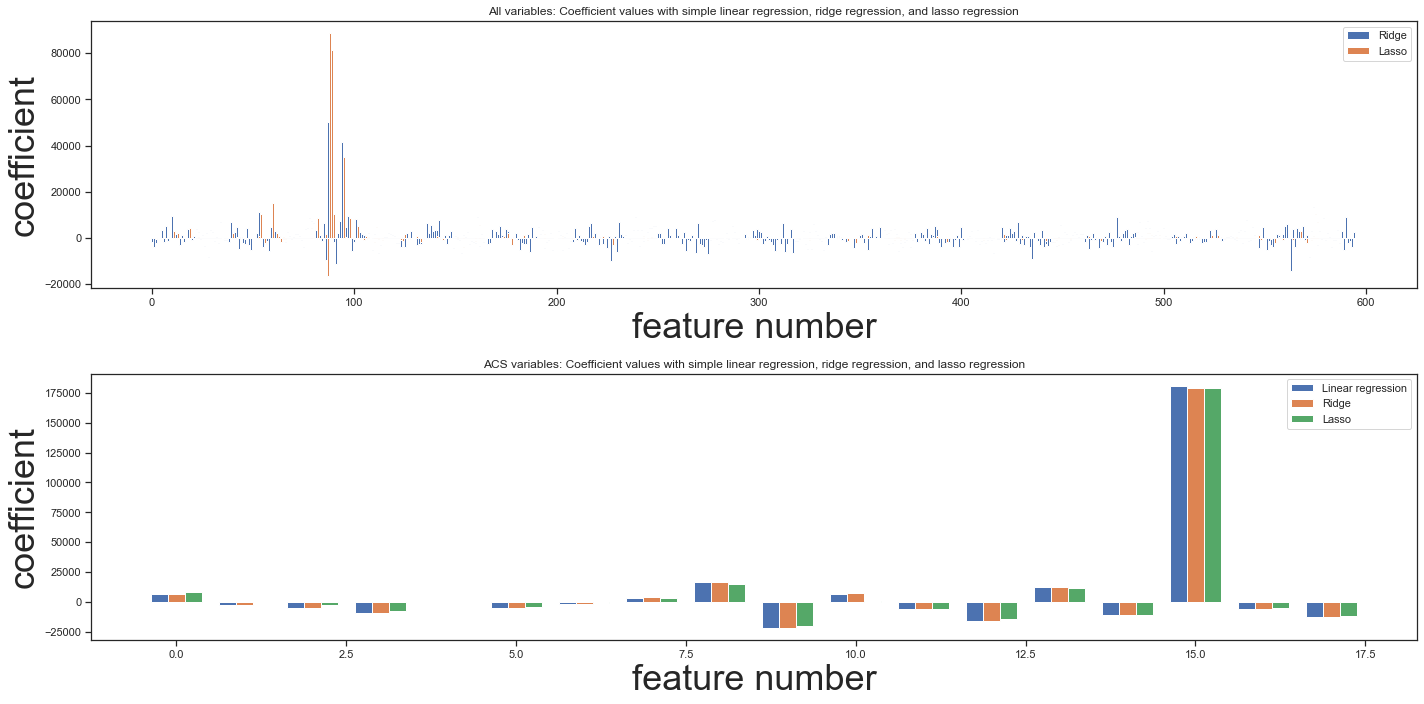

In [22]:
# Set up the bar plot arrangement
ind = np.arange(len(coef_all))
width = 1
pos = np.array([ind - width, ind, ind + width])
modelNames = ["Linear regression", "Ridge", "Lasso"]

plt.figure(figsize = (20,10))


# Plot the coefficients for Linear, Ridge, and Lasso models fit using all data
plt.subplot(211)
for i in range(1,3): #exculding OLS due to collinearity issues making coefficients huge
    plt.bar(x=pos[i], height = coef_all[:,i], label = modelNames[i])

plt.legend()
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("All variables: Coefficient values with simple linear regression, ridge regression, and lasso regression")

ind = np.arange(len(coef_sub))
width = 0.25
pos = np.array([ind - width, ind, ind + width])
modelNames = ["Linear regression", "Ridge", "Lasso"]


# Plot the coefficients for Linear, Ridge, and Lasso models fit using Subset data
plt.subplot(212)
for i in np.arange(3):
    plt.bar(x=pos[i], width = width, height = coef_sub[:,i], label = modelNames[i])
plt.legend()
plt.xlabel("feature number")
plt.ylabel("coefficient")
plt.title("ACS variables: Coefficient values with simple linear regression, ridge regression, and lasso regression")


plt.tight_layout()
plt.show()

In [23]:
print("Full dataset RMSE: ", np.sqrt(mse_all))
print("Subset variables RMSE: ", np.sqrt(mse_sub))

Full dataset RMSE:  [5.1107e+14 1.5975e+04 1.2041e+04]
Subset variables RMSE:  [17253.9668 17234.2972 17209.2325]


The results above (following the graph) show the MSE for the OLS, Ridge, and Lasso regressions respectively.

Summary for Full Data Set: The OLS results for the full dataset are far worse than Ridge and Lasso (the MSE is much higher for OLS). The reason could be collinearly. Also Lasso is slightly better than Ridge. From the class, we know that lasso tends to do better work if there are a small number of significant parameters and the others are close to zero. In our dataset with all features, some variables have collinearity and some features are not significant, which may explain why we get better results with regularization.

Summary for Sub Data Set: The subset model gives better results than full dataset. Also MSE values for OLS, ridge and Lasso are close to each other. However, Lasso is slightly better than the others.

In [24]:
print("Full dataset R2: ", r2_all)
print("Subset variables R2: ", r2_sub)

Full dataset R2:  [-2.3949e+20  7.6602e-01  8.6707e-01]
Subset variables R2:  [0.727  0.7277 0.7285]


These results also provide the R^2 for the OLS, Ridge, and Lasso regressions respectively. <p>
For the full dataset, the R^2 score for the OLS regression is negative which, according to the documentation, is a possibility. This seems to indicate how poor of a fit the OLS model is for the full dataset. R^2 is the highest for lasso, indicating that approximately 87% of the variation in this model can be attributed to the features in the model.<p>
While the R^2 scores for the subset model are much closer, we again see that the R^2 score for lasso is the highest. Thus, the R^2 scores align with what we found when comparing the RMSEs.


##### Ensemble methods

In the case of Bagging and Random Forest we do not use cross-validation to tune the hyperparamters because the act of drawing multiple samples in the process of training random forest prevents over-fitting. Indeed, we are following internally or "under the hood" an out-of-bag performance check with random forest. Since cross-validation is used only for the Boosting cases, the 'validation' data will be used for benchmarking throughout the models.

We use the `_test` datasets to perform model selection.

The cell below splits the data into test, train and validation.

In [25]:
X_all, X_all_test, y_all, y_all_test, X_all_train, X_all_val, y_all_train, y_all_val, X_sub, X_sub_test, y_sub, y_sub_test, X_sub_train, X_sub_val, y_sub_train, y_sub_val = reg.get_X_y_val(RECS_clean, RECS_ACS_subset, y, test_prop, rand_seed)


Ensemble methods

In [26]:
r2_all_bag, r2_sub_bag, bag_train_score_all, bag_val_score_all, bag_train_score_sub, bag_val_score_sub, r2_all_rf, r2_sub_rf, rf_train_score_all, rf_val_score_all, rf_train_score_sub, rf_val_score_sub, r2_all_gb, r2_sub_gb, gb_train_score_all, gb_val_score_all, gb_train_score_sub, gb_val_score_sub, bag_tree_all, rf_tree_all, gb_tree_all, bag_tree_sub, rf_tree_sub, gb_tree_sub = reg.ensemble_fit(X_all_train, y_all_train, X_all_val, y_all_val, X_sub_train, y_sub_train, X_sub_val, y_sub_val, y_all_test, X_all_test, y_sub_test, X_sub_test)

Bagging
[All] Train Score:  0.9499274107260405
[All] Validation Score:  0.7904857501461279
[Sub] Train Score:  0.873233688200612
[Sub] Validation Score:  0.6277312134886572
r2_all_bag:  0.7887823905969084
r2_sub_bag:  0.6666823867757825
Random Forest
[All] Train Score:  0.9210440267118972
[All] Validation Score:  0.7796610129077698
[Sub] Train Score:  0.8323306050870024
[Sub] Validation Score:  0.6779971350533947
r2_all_rf:  0.7799400015106174
r2_sub_rf:  0.6902265366889757
Boosting
{'max_depth': 5, 'n_estimators': 19}
[All] Train Score:  0.9340053294335883
[All] Validation Score:  0.7715797180131014
{'max_depth': 5, 'n_estimators': 19}
[Sub] Train Score:  0.832757671740558
[Sub] Validation Score:  0.655444600331975
r2_all_gb:  0.7745116845300606
r2_sub_gb:  0.7079609688140034


In the code cell below, we compare the MSE of all emsemble methods. We observe that among 3 ensemble method, boosting works better for sub and bagging works better for All.

In [27]:
models_all = [bag_tree_all, rf_tree_all, gb_tree_all]
models_sub = [bag_tree_sub, rf_tree_sub, gb_tree_sub]

mse_ensemble_all = []
mse_ensemble_sub = []
for i, j in zip(models_all, models_sub):
    print('[All] Test RMSE: ', np.sqrt(mean_squared_error(y_all_test, i.predict(X_all_test))))
    mse_ensemble_all.append(mean_squared_error(y_all_test, i.predict(X_all_test))) 
    print('[Sub] Test RMSE: ', np.sqrt(mean_squared_error(y_sub_test, j.predict(X_sub_test))))
    mse_ensemble_sub.append(mean_squared_error(y_sub_test, j.predict(X_sub_test)))

[All] Test RMSE:  15177.728129130584
[Sub] Test RMSE:  19066.49392856057
[All] Test RMSE:  15492.170237635895
[Sub] Test RMSE:  18380.774770735297
[All] Test RMSE:  15682.082307050243
[Sub] Test RMSE:  17846.873992859066


In the code cell below, we visualize the importance of features for random forests and boosting. For random forests, we see that total energy cost is the most important feature. After that, the type of housing, total number of rooms and bedrooms are important. For boosting, we see that total energy cost is the most important feature, followed by the annual gross HH income.

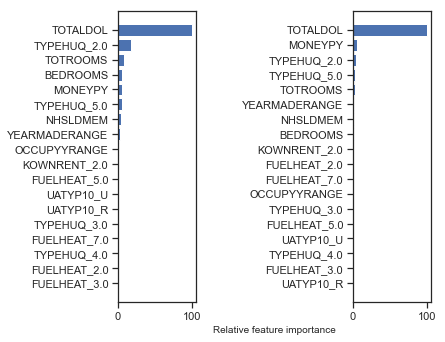

In [28]:
reg.importance_plot(rf_tree_sub, gb_tree_sub, X_sub) #cannot see

Comparing our ensemble methods, we see that Bagging works best for the full dataset but Boosting works best for the subset of explanatory variables, on the basis of test RMSE. The amount of energy expenditure is the best predictor for the quantity of energy expenditrure, as well as the type of housing unit and thenumber of bedrooms.

### KNN with Cross Validation

Explore whether a non-parametric approach could yield a higher-performing model.

10-fold CV appeared to give the best results. We then used k-fold cross validation to determine the optimal k values.

In [29]:
sqrt_sub_mses_knn, sqrt_all_mses_knn, mses_sub_knn, mses_all_knn, r2_all_knn, r2_sub_knn = reg.KNN_fit(X_sub_train, y_sub_train,  X_all_train, y_all_train, X_sub_test, y_sub_test, X_all_test, y_all_test)


r2_sub_knn:  0.4175864204509897
r2_all_knn:  0.35464167138393643


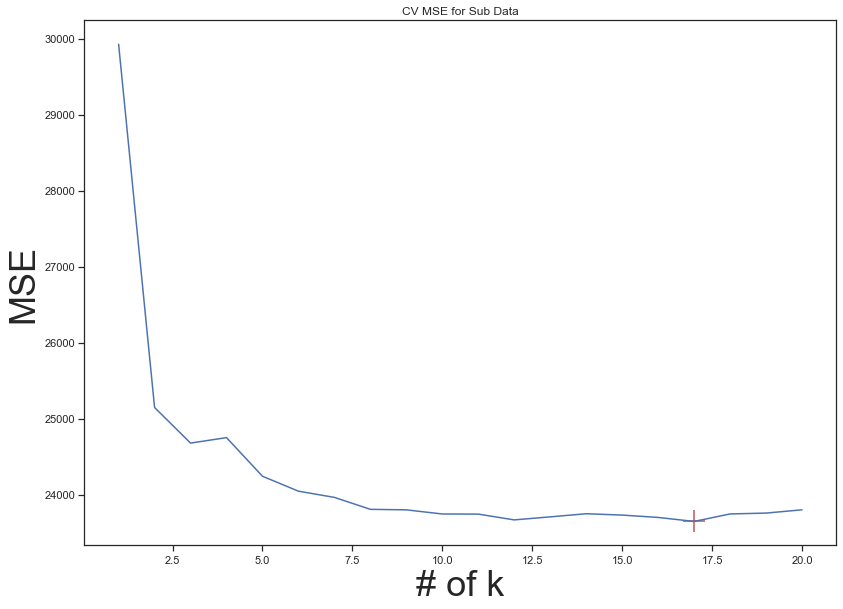

In [30]:
x= np.linspace(1,20,20)
y=sqrt_sub_mses_knn
plt.plot(x ,y)

plt.title("CV MSE for Sub Data")
plt.xlabel("# of k")
plt.ylabel("MSE")
plt.scatter(mses_sub_knn.index(max(mses_sub_knn)) +1, min(sqrt_sub_mses_knn), c='r',s=500, marker="+")
plt.show()

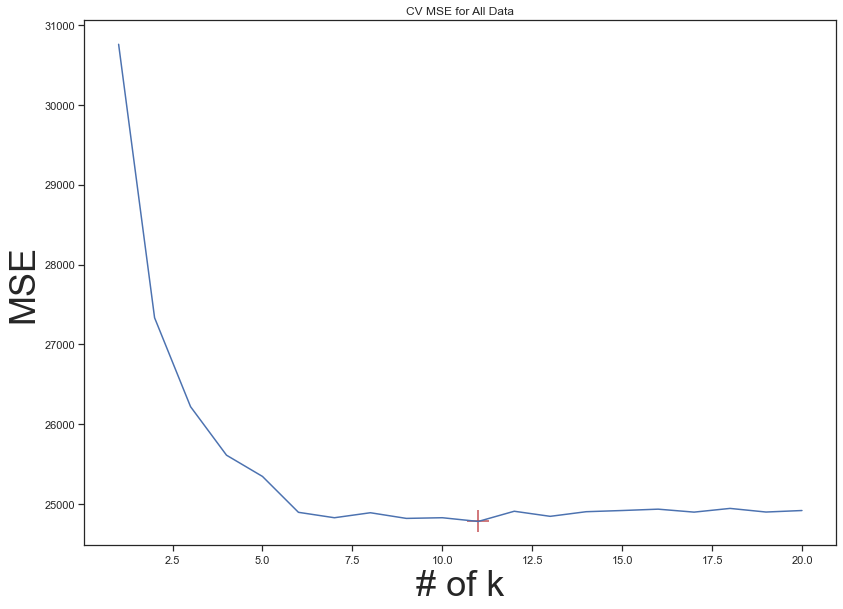

In [31]:
x= np.linspace(1,20,20)
y=sqrt_all_mses_knn
plt.plot(x ,y)

plt.title("CV MSE for All Data")
plt.xlabel("# of k")
plt.ylabel("MSE")
plt.scatter(mses_all_knn.index(max(mses_all_knn)) +1, min(sqrt_all_mses_knn), c='r',s=500, marker="+")
plt.show()

## Comparison of 7 different Models: OLS, Ridge, Lasso, KNN, 3 ensemble methods

In this section, we compared the RMSE of 7 different methods to see which one works best for predicting a household's total energy consumtion in California.

In [32]:
#Collect MSE test
#Collecct OLS & regularization
mse_reg_all = list(mse_all)
mse_reg_sub = list(mse_sub)

#Add ensemble methods
mse_reg_all.extend(mse_ensemble_all)
mse_reg_sub.extend(mse_ensemble_sub)

#Add KNN methods
mse_reg_all.append(min(sqrt_all_mses_knn**2))
mse_reg_sub.append(min(sqrt_sub_mses_knn**2))


In [33]:
for i in np.arange(7):
    print(np.sqrt(mse_reg_all[i]))

511074042612994.1
15974.519122131109
12040.89236582987
15177.728129130584
15492.170237635895
15682.082307050243
24784.38198760579


In [34]:
#ind = np.arange(7)
width = 0.5
pos = np.array([1-3*width, 1-2*width, 1 - width, 1, 1 + width, 1+2*width, 1+3*width])
modelNames_all = ["All: OLS", "All: Ridge", "All: Lasso", "All: Bagging", "All: RF", "All: Boosting","All:KNN"]
modelNames_sub = ["Sub: OLS", "Sub: Ridge", "Sub: Lasso","Sub: Bagging", "Sub: RF", "Sub: Boosting","Sub:KNN"]
places = ['All', 'Sub']
plt.figure(figsize = (5, 6))

#don't plot OLS for all variables -too overfit
mse_reg_all[0] = 1000000000
colors = sns.color_palette("Set2")

for i in np.arange(7):
    plt.bar(x = pos[i], width = width, height = np.sqrt(mse_reg_all[i]), label = modelNames_all[i], color=colors[i]) #all
    plt.bar(x = pos[i]+width*9, width = width, height = np.sqrt(mse_reg_sub[i]), label = modelNames_sub[i], color=colors[i]) #subset

    
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Model Type", fontsize = 10)
plt.xticks([1-0.01*width, 1 + 9*width], places)
plt.ylabel("Test RMSE [kBTU]", fontsize = 10)
plt.title("RMSE comparison in all variables and subset", fontsize = 10)

Text(0.5, 1.0, 'RMSE comparison in all variables and subset')

As illustrated in the table above, for both the all and subset datasets, Lasso works best with its smallest RMSE value. So in the following sections, we will be using Lasso to predict TOTALBTU for ACS data set. Note that we cut the OLS for the full (All) number of variables at 30000 in order to appreacite the performance of other models, but the value is severla orderrs of magnitude higher given the high levels of multicollinearity in the dull dataset.

In [36]:
print('r2_all_rf: ', r2_all_rf)
print('r2_all_gb: ', r2_all_gb)
print('r2_all_bag: ', r2_all_bag)
print('r2_all_knn: ', r2_all_knn)
print("r2_all_OLS: ", r2_all[0])
print("r2_all_Ridge: ", r2_all[1])
print("r2_all_Lasso: ", r2_all[2])



print('r2_sub_rf: ', r2_sub_rf)
print('r2_sub_gb: ', r2_sub_gb)
print('r2_sub_bag: ', r2_sub_bag)
print('r2_sub_knn: ', r2_sub_knn)
print("r2_sub_OLS: ", r2_sub[0])
print("r2_sub_Ridge: ", r2_sub[1])
print("r2_sub_Lasso: ", r2_sub[2])

r2_all_rf:  0.7799400015106174
r2_all_gb:  0.7745116845300606
r2_all_bag:  0.7887823905969084
r2_all_knn:  0.35464167138393643
r2_all_OLS:  -2.394882617812172e+20
r2_all_Ridge:  0.7660235370248969
r2_all_Lasso:  0.8670666550644498
r2_sub_rf:  0.6902265366889757
r2_sub_gb:  0.7079609688140034
r2_sub_bag:  0.6666823867757825
r2_sub_knn:  0.4175864204509897
r2_sub_OLS:  0.7270428354220329
r2_sub_Ridge:  0.7276648229541136
r2_sub_Lasso:  0.7284563887976785


As we see in the tabel above, for all and subset the max R2 comes from Lasso. 

---
## Classification on SCALEB - only in 2015<a id='class'></a>

We will only train the variables that we also have for the ACS dataset in these cases, so we are using the `_sub` dataframes throughout.

We will try ensemble methods and SVC and decide which method to use based on the confusion matrix of these four methods.

#### Selecting SCALEB as qualitative response value

`SCALEB` responds to the question of whether a houshold has had to forgo energy needs in the last year, and if so, what was the frequency of this event.

In [11]:
y_qual=Y[["SCALEB"]].reset_index(drop = True)

# creating a dict file  
forgoing = {0:'Never',  1:'Almost every month',2:'Some months',  3:'1 or 2 months'}   
# traversing through dataframe 
# write values where key matches 
y_qual['SCALEB'] = [forgoing[item] for item in y_qual['SCALEB']] 
y_qual['SCALEB'].value_counts()

Never                 854
Some months           108
1 or 2 months          66
Almost every month     57
Name: SCALEB, dtype: int64

We see that there are very little number of observations that are experiencing the need to forego energy needs at any frequency interval. We choose to cluster the positive responses into `Yes` in thte hopes of reducng the disproportionate of observation falling into one class: 

In [12]:
#Try with 2 categories first
y_qual=Y_norm[["SCALEB"]].reset_index(drop = True)

# creating a dict file  
forgoing = {0:'Never',  1:'Yes',2:'Yes',  3:'Yes'}   
# traversing through dataframe 
# write values where key matches 
y_qual['SCALEB'] = [forgoing[item] for item in y_qual['SCALEB']] 
y_qual['SCALEB'].value_counts()

Never    854
Yes      231
Name: SCALEB, dtype: int64

### Ensemble methods  for SCALEB

The cell below splits the data into test, train and validation.

In [19]:
X_all, X_all_test, y_all, y_all_test, X_all_train, X_all_val, y_all_train, y_all_val, X_sub, X_sub_test, y_sub, y_sub_test, X_sub_train, X_sub_val, y_sub_train, y_sub_val = reg.get_X_y_val(RECS_clean, RECS_ACS_subset, y_qual, test_prop, rand_seed)


In [42]:
bag_train_score_all, bag_val_score_all, bag_train_score_sub, bag_val_score_sub, rf_train_score_all, rf_val_score_all, rf_train_score_sub, rf_val_score_sub, gb_train_score_all, gb_val_score_all, gb_train_score_sub, gb_val_score_sub, bag_tree_all, rf_tree_all, gb_tree_all, bag_tree_sub, rf_tree_sub, gb_tree_sub = classif.ensemble_fit(X_all_train, y_all_train, X_all_val, y_all_val, X_sub_train, y_sub_train, X_sub_val, y_sub_val, y_all_test, X_all_test, y_sub_test, X_sub_test)

Bagging
[All] Train Score:  0.9971181556195965
[All] Validation Score:  0.8045977011494253
[Sub] Train Score:  0.9610951008645533
[Sub] Validation Score:  0.7758620689655172
Random Forest
[All] Train Score:  0.9438040345821326
[All] Validation Score:  0.8045977011494253
[Sub] Train Score:  0.8876080691642652
[Sub] Validation Score:  0.7931034482758621
Boosting
{'max_depth': 3, 'n_estimators': 19}
[All] Train Score:  0.861671469740634
[All] Validation Score:  0.8103448275862069
{'max_depth': 2, 'n_estimators': 17}
[Sub] Train Score:  0.7997118155619597
[Sub] Validation Score:  0.7931034482758621


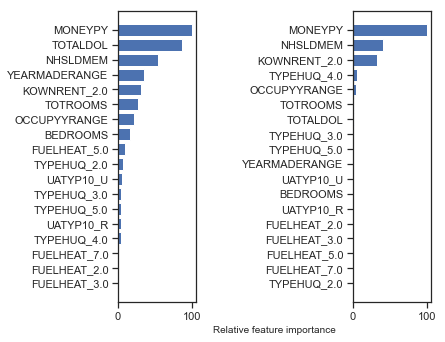

In [50]:
reg.importance_plot(rf_tree_sub, gb_tree_sub, X_sub) # cannot plot a bagging feature importance because each of the
                                        #trees that are being constructed has a different subset of 10 
                                        #explanatory variables being used

Here, income (`MONEYPY`) is the best predictor for whether a household has to forego energy needs or not, as we had seen in the preliminary visulisations of the dataset. Moreover, energy expenditure (`TOTALDOL`) and number of houshold memebers (`NHSLDMEM`) are also importnatn predictors.   

### Comparing all ensemble methods

In [49]:
models = [bag_tree_sub, rf_tree_sub, gb_tree_sub]
for i in models:
    print('Test Score for: '+str(i), i.score(X_sub_test, y_sub_test))
    
    y_pred = i.predict(X_sub_test)
    print(confusion_matrix(y_sub_test,y_pred))
    print('Test Score: ', i.score(X_sub_test, y_sub_test))
    print(classification_report(y_sub_test,y_pred)) 

Test Score for: BaggingClassifier(max_features=10, max_samples=400, n_estimators=500,
                  random_state=5) 0.8018433179723502
[[169   6]
 [ 37   5]]
Test Score:  0.8018433179723502
              precision    recall  f1-score   support

       Never       0.82      0.97      0.89       175
         Yes       0.45      0.12      0.19        42

    accuracy                           0.80       217
   macro avg       0.64      0.54      0.54       217
weighted avg       0.75      0.80      0.75       217

Test Score for: RandomForestClassifier(max_depth=15, max_features=10, max_samples=500,
                       min_samples_leaf=4, n_estimators=600, random_state=5) 0.7880184331797235
[[160  15]
 [ 31  11]]
Test Score:  0.7880184331797235
              precision    recall  f1-score   support

       Never       0.84      0.91      0.87       175
         Yes       0.42      0.26      0.32        42

    accuracy                           0.79       217
   macro avg       0.63

- Comparing the classification scores we see that Gradient Boosting offers the highest test score
- Comparing the confusion matrices we notice that the Gradient Boosting has the least number of missclassfications (44 observatioons in the off diagonal) but a high skew towards misclassifying the second class (respondents that have experienced the need to forego energy services). These false negatives are ultimately what is most important to us, since we want to correctly capture these experiences of energy deprivation. 

Hence we believe that Random Forest is the most balanced in terms of correctly classifying both houhsolds that did not forego energy needs and those that did do so, despite a higher missclassification rate overall (46 observations in off-diagonal).

### Support Vector Classifier (SVC)

We use a cross-validated Support Vector classifier to see if our prediction improves.

In [20]:
classif.SVC_fit(X_sub_train,y_sub_train, X_sub_test, y_sub_test,X_all_train,y_all_train,X_all_test,y_all_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.1s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, ker

We also noticed that when we allowed cross-validation to occur at lower C miss-classification budgets we were constantly getting the optimal model with only correct classification for the first class (people who have not experieced the need to forego energy needs, so we decided to not allow dir such cases by kimiting the gris search to levels of miss-classification that alllowed for it to classify at least some instances of peorple foregoing energy need (`Yes` cases).

Based on the confusion matrices for the three ensemble methods and the SVC, we conclude that the Random Forest is the best model to use for classification of our response variable `SCALEB` since it allows for the highest number of correct classification sof 

---
## Interpretation and Conclusions <a id='conclusions'></a>

In this section we address our resource allocation question, which is predicting the distribution of energy poverty at a high spatial resolution across California. In order to do so we will first apply our best regression and classification models to the cleaned ACS dataframe generated by `ACS_EDA.ipynb` to create out of sample predictions of energy consumption `TOTALBTU` and experiences fo energy deprivations `SCALEB` for census block groups in California. Then, we will calculate derive energy poverty metrics including energy burden, and primary energy poverty indicators put forwards by the EU Energy Poverty Observatory to visualise their distribution of their prevalence across different counties in California.

---
#### Resource Allocation - estimating energy poverty at a high resolution <a id='res_alloc'></a>

Apply best methods at a high resolution to predict energy poverty indicators<br>

In [13]:
import allocation_acs as alloc

#### Import ACS data cleaned in the same way as the RECS sub dataset

In [14]:

if year_analysis == 2015:
    acs_data_raw = pd.read_csv('/Users/cristinacrespo/Desktop/UC BERKELEY/Master Capstone/model/in/ACS_data_2015.zip',dtype={'STATEFP':str, 'COUNTYFP':str, 'TRACTCE':str, 'BLKGRPCE':str}).drop(columns = "Unnamed: 0")
else:
    acs_data_raw = pd.read_csv('/Users/cristinacrespo/Desktop/UC BERKELEY/Master Capstone/model/in/ACS_data_2009.zip',dtype={'STATEFP':str, 'COUNTYFP':str, 'TRACTCE':str, 'BLKGRPCE':str}).drop(columns = "Unnamed: 0")

acs_data_raw.head(2)

,Tract ID,BLKGRPCE,TRACTCE,COUNTYFP,STATEFP,County Name,Mobile Home,"1, detached","1, attached",2 to 4,...,Electricity,Wood,Aggregate Members Per Household,Aggregate Household Income in the Past 12 Months,Household Income in the Past 12 Months,Avg. Annual Energy Cost,Normalized Avg. Annual Energy Cost,Percentage of Rural Population,Percentage of Urban Cluster Population,Percentage of Urban Area Population
0,6001409700,4,409700,001,06,Alameda County,0.0,0.619048,0.000000,0.258503,...,0.363265,0.0,0.508772,79778.846154,0.189314,1690,0.275666,0.0039,0.0,0.9961
1,6001409700,1,409700,001,06,Alameda County,0.0,0.639665,0.092179,0.111732,...,0.341693,0.0,0.367339,51989.028213,0.118960,1690,0.275666,0.0039,0.0,0.9961


We first drop columns that are irrelevant with the normalized one-hot encoder modelling we have created. Notice that in this case we are using normalized proportions instead of binary coding for these variables (explained in the ACS_EDA.ipynb. We conserve the structure of the _subdataframefor RECS so that we can apply the models directly to these new observations.

In [15]:
# Dropping columns that are the redundant with the one-hot enecoder
acs_data = acs_data_raw.drop(columns = ['Mobile Home','Owned','Utility Gas', 'Percentage of Urban Cluster Population'] )

#Dropping extra columns that have absolute values of energy expenditure and income used 
#later to calculate enrgy brdern but only used in nirmalized form for predictions
acs_data = acs_data.drop(columns = ['Aggregate Household Income in the Past 12 Months','Avg. Annual Energy Cost'] )

#Drop geospatial infor for predictions
acs_formatted = acs_data.drop(columns = ['Tract ID','BLKGRPCE','TRACTCE','COUNTYFP','STATEFP','County Name'] )


acs_formatted.shape

(22915, 18)

In [16]:
#check number of columns with RECS
RECS_ACS_subset.shape

(1085, 18)

In [17]:
acs_formatted.head()

,"1, detached","1, attached",2 to 4,5 or more,Rented,Aggregate Year House Built,Aggregate Year Moved In,Aggregate Number of Bedrooms Per Household,Aggregate Number of Rooms Per Household,"Bottled, tank, or LP gas","Fuel oil, kerosene, etc.",Electricity,Wood,Aggregate Members Per Household,Household Income in the Past 12 Months,Normalized Avg. Annual Energy Cost,Percentage of Rural Population,Percentage of Urban Area Population
0,0.619048,0.000000,0.258503,0.122449,0.493464,0.437511,0.699541,0.323652,0.404898,0.000000,0.0,0.363265,0.000000,0.508772,0.189314,0.275666,0.0039,0.9961
1,0.639665,0.092179,0.111732,0.156425,0.560386,0.343978,0.704189,0.313231,0.481715,0.062696,0.0,0.341693,0.000000,0.367339,0.118960,0.275666,0.0039,0.9961
2,0.446404,0.052917,0.181818,0.318860,0.661621,0.554631,0.740823,0.312439,0.397243,0.000000,0.0,0.345161,0.006452,0.415312,0.099065,0.275666,0.0039,0.9961
3,0.582051,0.066667,0.200000,0.151282,0.549204,0.297005,0.576115,0.311864,0.431026,0.000000,0.0,0.189112,0.000000,0.473265,0.114540,0.275666,0.0039,0.9961
4,1.000000,0.000000,0.000000,0.000000,0.353774,0.284150,0.414550,0.370149,0.567814,0.000000,0.0,0.491018,0.000000,0.325363,0.243019,0.302842,0.0039,0.9961


#### Run best models for the two Y predictions (TOTALBTU and SCALEB)
We now apply thte two best models fir the subset of RECS variables to the `acs_data`variables, formatted in the same shape and order as the `RECS_ACS_subset`.

##### Regression on TOTALBTU

The code below repeats the Lasso regression for Subset RECS data. With that model, we can predict y (TOTALBTU) for ACS data set.

In the cell below, we see the predicted TOTALBTU for ACS data in the last column.

In [20]:
pred_name = "TOTALBTU_predicted"
acs_data_raw = alloc.regression_prediction(RECS_ACS_subset, y, pred_name, acs_formatted, acs_data_raw)
acs_data_raw.head()

,Tract ID,BLKGRPCE,TRACTCE,COUNTYFP,STATEFP,County Name,Mobile Home,"1, detached","1, attached",2 to 4,...,Wood,Aggregate Members Per Household,Aggregate Household Income in the Past 12 Months,Household Income in the Past 12 Months,Avg. Annual Energy Cost,Normalized Avg. Annual Energy Cost,Percentage of Rural Population,Percentage of Urban Cluster Population,Percentage of Urban Area Population,TOTALBTU_predicted
0,6001409700,4,409700,001,06,Alameda County,0.0,0.619048,0.000000,0.258503,...,0.000000,0.508772,79778.846154,0.189314,1690,0.275666,0.0039,0.0,0.9961,78234.657323
1,6001409700,1,409700,001,06,Alameda County,0.0,0.639665,0.092179,0.111732,...,0.000000,0.367339,51989.028213,0.118960,1690,0.275666,0.0039,0.0,0.9961,77929.615302
2,6001409700,2,409700,001,06,Alameda County,0.0,0.446404,0.052917,0.181818,...,0.006452,0.415312,44130.537975,0.099065,1690,0.275666,0.0039,0.0,0.9961,74625.400352
3,6001409700,3,409700,001,06,Alameda County,0.0,0.582051,0.066667,0.200000,...,0.000000,0.473265,50243.315508,0.114540,1690,0.275666,0.0039,0.0,0.9961,80162.393976
4,6001409800,1,409800,001,06,Alameda County,0.0,1.000000,0.000000,0.000000,...,0.000000,0.325363,100992.647059,0.243019,1843,0.302842,0.0039,0.0,0.9961,87923.052443


To see the validity of our prediction, we compare ASC predicted with TOTALBTU consuption in RECS data.

Since we have average values for the typical household per census block group, we have less outlier observations. Because we are masking their effect by taking averages of the census block group, which results in distribution of energy consumption predictions that is “tighter”. This means that smaller spread since smaller Max, greater mean and min, and smaller standard deviation in comparison to the Y observations which come from individual households in RECS so they could be more extreme cases and outliers.

In [16]:
acs_data_raw[["TOTALBTU_predicted"]].describe()

,TOTALBTU_predicted
count,22915.000000
mean,80953.329555
std,22539.885542
min,16591.017817
25%,66412.309868
50%,81140.769010
75%,94658.896698
max,209641.072749


In [17]:
Y[["TOTALBTU"]].describe()

,TOTALBTU
count,1085.000000
mean,54911.308131
std,31610.519790
min,4235.967000
25%,30689.704000
50%,50119.759000
75%,71035.766000
max,237806.431000


---
##### Classification on SCALEB

In [22]:
#using acs_data for the X, predict y
# Use Random Forest for sub model

In [21]:
pred_name = "SCALEB_predicted"
acs_data_raw = alloc.classification_prediction(RECS_clean, RECS_ACS_subset, y_qual, pred_name, acs_formatted, acs_data_raw)
acs_data_raw.head()

Train Score:  0.8876080691642652
Validation Score:  0.7931034482758621


,Tract ID,BLKGRPCE,TRACTCE,COUNTYFP,STATEFP,County Name,Mobile Home,"1, detached","1, attached",2 to 4,...,Aggregate Members Per Household,Aggregate Household Income in the Past 12 Months,Household Income in the Past 12 Months,Avg. Annual Energy Cost,Normalized Avg. Annual Energy Cost,Percentage of Rural Population,Percentage of Urban Cluster Population,Percentage of Urban Area Population,TOTALBTU_predicted,SCALEB_predicted
0,6001409700,4,409700,001,06,Alameda County,0.0,0.619048,0.000000,0.258503,...,0.508772,79778.846154,0.189314,1690,0.275666,0.0039,0.0,0.9961,78234.657323,Never
1,6001409700,1,409700,001,06,Alameda County,0.0,0.639665,0.092179,0.111732,...,0.367339,51989.028213,0.118960,1690,0.275666,0.0039,0.0,0.9961,77929.615302,Never
2,6001409700,2,409700,001,06,Alameda County,0.0,0.446404,0.052917,0.181818,...,0.415312,44130.537975,0.099065,1690,0.275666,0.0039,0.0,0.9961,74625.400352,Yes
3,6001409700,3,409700,001,06,Alameda County,0.0,0.582051,0.066667,0.200000,...,0.473265,50243.315508,0.114540,1690,0.275666,0.0039,0.0,0.9961,80162.393976,Never
4,6001409800,1,409800,001,06,Alameda County,0.0,1.000000,0.000000,0.000000,...,0.325363,100992.647059,0.243019,1843,0.302842,0.0039,0.0,0.9961,87923.052443,Never


From the predicted SCALEB(Frequency of reducing or forgoing basic necessities due to home energy bill) for ASC data, we observe 20450 "Never" and 2465 "Yes".

In [22]:
acs_data_raw["SCALEB_predicted"].value_counts()

Never    20450
Yes       2465
Name: SCALEB_predicted, dtype: int64

In [23]:
y_qual=Y_norm[["SCALEB"]].reset_index(drop = True)

# creating a dict file  
forgoing = {0:'Never',  1:'Yes',2:'Yes',  3:'Yes'}   
# traversing through dataframe 
# write values where key matches 
y_qual['SCALEB'] = [forgoing[item] for item in y_qual['SCALEB']] 
y_qual['SCALEB'].value_counts()

Never    854
Yes      231
Name: SCALEB, dtype: int64

In our predictions, 11% of the census block groups typical housholds are predicted to have experienced foregoing needs to pay energy bills. However, in our sample data the prevalence is double, at 20%. This can be due to the low level of correct classifications for households experiencing having to forego enegy needs that we observed when evaluating the methods, in part due to the limited amount of training observations who responded positively to the question on foregoing necessities.

In [24]:
acs_data_raw = alloc.indicator_calc(acs_data_raw)

## Plot indicators per county 

We first define a plotting function per county, so that we can get further refinement of the distribution of the indicators across space. We will then select the indicator to plot and the number of counties to plot.

In [100]:
def create_indicator_map(geo_data_path, state, county, df, indicator, image_path, color=None):
    """Creates a map visualizing the ACS indicator of choice
    
    Args:
        state: str
        county: str.
        df: dataframe cointaining the ACS indicator/ transformed indiator that we want to plot 
        #image_path: str. the path to save the image "folder/file.png"
        color: int. 0=red 1=orange 2=green 3=blue 4=purple, random if none
        
    """
    # read data
    blocks_map_state = gpd.read_file(geo_data_path +'cb_2019_'+state+'_bg_500k.shp')
    
    #filter all CBG in the selected county
    blocks_map_state_county = blocks_map_state[blocks_map_state['COUNTYFP'] == county]
    
    if county =='075':
        #drop island off the coast of SF
        #blocks_map_state_county[blocks_map_state_county['GEOID'] == '060759804011'] 
        
        blocks_map_state_county = blocks_map_state_county.drop(8143)
    else:
        pass
    
    # randomly choose a color scheme
    cmaps = ['Reds_r', 'Oranges_r', 'Greens_r', 'Blues_r', 'Purples_r', 'Pinks_r'] #magma
    cmap = cmaps[color]
        
    #combine geospatial data with census indicators, ensuring data types are the same for merge
    geog_id = ['STATEFP','COUNTYFP','TRACTCE','BLKGRPCE']
    df[geog_id] = df[geog_id].astype(str)
    
    blocks_county_ind = blocks_map_state_county.merge(df, on = geog_id)
    
    #save county name
    county_name = blocks_county_ind['County Name'].values[0]
    
    # combine blocks to get a city outline
    outline = blocks_map_state_county.dissolve(by=blocks_map_state_county.columns[0], 
                                       aggfunc='first')

    # plot
    fig, ax = plt.subplots(figsize=(12,12))
    #no data in gery
    blocks_county_ind.plot(ax=ax, color='lightgrey', alpha=.5) #or red?

    # set the legend specifications
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    # add the map with the choropleth
    blocks_county_ind.plot(ax=ax, 
                            column=indicator, 
                            cmap=cmap,
                            legend=True, 
                            cax=cax,
                          )
    outline.plot(ax=ax, 
                 facecolor='none', 
                 edgecolor='grey', 
                 linewidth=.5)
    ax.set_title(county_name + ' '+''+ ' ' +indicator+'  per CBG (2015 5y ACS)', fontsize=20)
    fig.patch.set_visible(False)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(image_path)

In [ ]:
#select state and county of interest
state_FIPS = '06' #CA
counties_FIPS = ['001', '041','055','075', '013', '081', '085', '095', '097'] #Alameda '001', Marin '041', Napa '055', SF '075', Contra Costa '013', 
geo_data_path = 'data/geo_data/'                  #San Mateo '081', Santa Clara '085', Solano '095', Sonoma '097'
indicator = "2M"

for i, county in enumerate(counties_FIPS):
    #get county ACS indicators
    #county_acs = county_indicators(state_FIPS, county)
    
    #plot CBG indicators on County maps
    image_path = 'data/'+ indicator + '_' +county + '.png'
    create_indicator_map(geo_data_path, state_FIPS, county, acs_data_raw, indicator, image_path, color=0) #change colour for differnet indicators



---
## Repository of data and models

All data files and models for this project can be found in [Github](https://github.com/criscres/Energy-poverty-US)